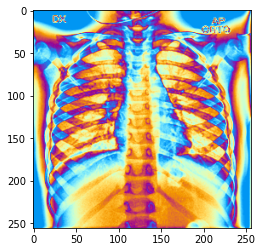

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import skimage.io as io
from copy import deepcopy
image = plt.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\rgb transformed images\sample\a.png')
plt.imshow(image)

In [2]:
image.shape

(256, 256, 3)

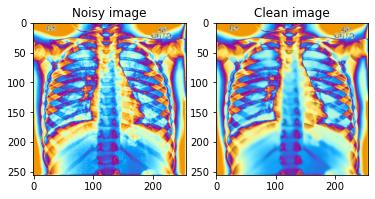

True

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\rgb transformed images\sample\a.png')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,29)
plt.subplot(121),plt.imshow(img),plt.title('Noisy image')
plt.subplot(122),plt.imshow(dst),plt.title('Clean image')
plt.show()
cv2.imwrite(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\clean.png', dst)

3


True

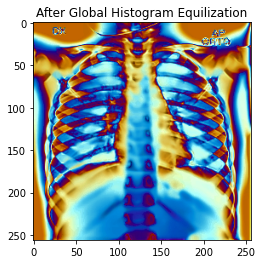

In [4]:
# import numpy as np
# import cv2
# img = cv2.imread('clean.png',0)
# # create a CLAHE object (Arguments are optional).
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# cl1 = clahe.apply(img)
# plt.imshow(cl1),plt.title('After Global Histogram Equilization')
# cv2.imwrite('histogram.png',cl1)

import cv2
import os

img = cv2.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\clean.png')
ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
channels=cv2.split(ycrcb)
print(len(channels))
cv2.equalizeHist(channels[0],channels[0])
cv2.merge(channels,ycrcb)
cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR,img)
plt.imshow(img),plt.title('After Global Histogram Equilization')
cv2.imwrite('histogram.png',img)

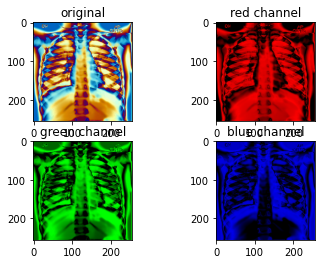

In [5]:
img=io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\histogram.png')
r=deepcopy(img)
g=deepcopy(img)
b=deepcopy(img)
r[:,:,1]=0
r[:,:,2]=0
g[:,:,0]=0
g[:,:,2]=0
b[:,:,0]=0
b[:,:,1]=0
fig, ax=plt.subplots(ncols=2,nrows=2)
ax[0,0].imshow(img)
ax[0,0].set_title('original')
ax[0,1].imshow(r)
ax[0,1].set_title('red channel')
ax[1,0].imshow(g)
ax[1,0].set_title('green channel')
ax[1,1].imshow(b)
ax[1,1].set_title('blue channel')
plt.show()

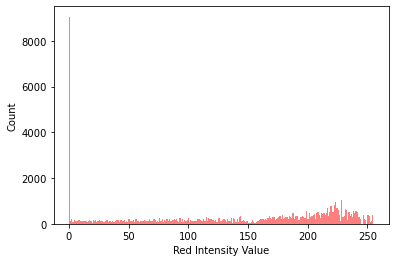

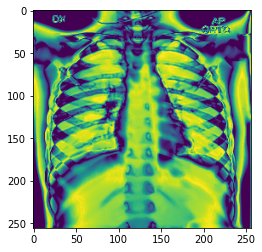

In [6]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\histogram.png')
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.xlabel('Red Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,0], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\rplane.png', x)
plt.imshow(x)

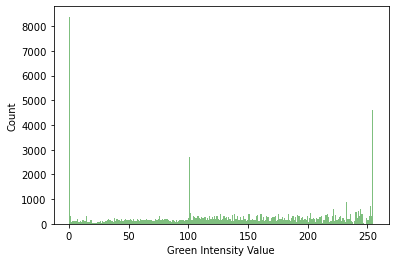

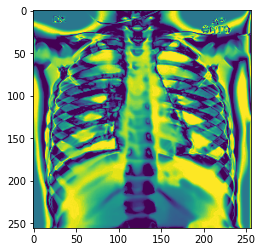

In [7]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\histogram.png')
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.xlabel('Green Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,1], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\gplane.png', x)
plt.imshow(x)

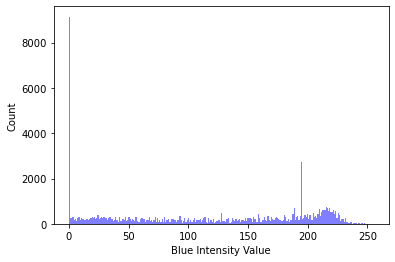

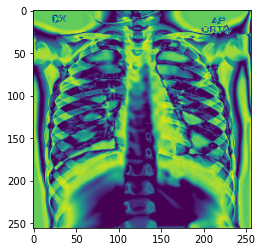

In [8]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\histogram.png')
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Blue Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,2], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\bplane.png', x)
plt.imshow(x)

In [9]:
image = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\rplane.png')
a = np.array(image[:,:,], dtype = np.uint8)
print("MATRIX FOR R PLANE HISTOGRAM WITH COUNTS:")
#a.flatten()
#print (a)
#for i in a.flatten():
#    print(i)

d = dict()
for i in range (0,256):
    d[i]=0

x = []
for i in range (0,256):
    x.append(i)
#print(x)    

y = []
for i in range (0,256):
    y.append(d[i])
#print(y)

num = 0
den = 0
for i in a.flatten():
    d[i] = d.get(i,0) + 1

for i in x:
        b = d.get(i,0) + 1
        
        num = num + b*i
        den = den + b
cogr = num / den
print (d)
print("COG of R plane=",cogr)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
image = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\gplane.png')
b = np.array(image[:,:,], dtype = np.uint8)
print("MATRIX FOR G PLANE HISTOGRAM WITH COUNTS:")
#b.flatten()
#print (a)
#for i in b.flatten():
#    print(i)

e = dict()
for i in range (0,256):
    e[i]=0

x = []
for i in range (0,256):
    x.append(i)
#print(x)    

y = []
for i in range (0,256):
    y.append(e[i])
#print(y)

num = 0
den = 0
for i in b.flatten():
    e[i] = e.get(i,0) + 1

for i in x:
        k = e.get(i,0) + 1
        num = num + k*i
        den = den + k
cogg = num / den
print (e)
print("COG of G plane=",cogg)

print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
image = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\bplane.png')
c = np.array(image[:,:,], dtype = np.uint8)
print("MATRIX FOR B PLANE HISTOGRAM WITH COUNTS:")
#a.flatten()
#print (a)
#for i in a.flatten():
#    print(i)

f = dict()
for i in range (0,256):
    f[i]=0

x = []
for i in range (0,256):
    x.append(i)
#print(x)    

y = []
for i in range (0,256):
    y.append(f[i])
#print(y)

num = 0
den = 0
for i in c.flatten():
    f[i] = f.get(i,0) + 1

for i in x:
        l = f.get(i,0) + 1
        num = num + l*i
        den = den + l
cogb = num / den
print (f)
print("COG of B plane=",cogb)

MATRIX FOR R PLANE HISTOGRAM WITH COUNTS:
{0: 9052, 1: 119, 2: 190, 3: 93, 4: 158, 5: 144, 6: 137, 7: 117, 8: 156, 9: 127, 10: 127, 11: 102, 12: 125, 13: 125, 14: 104, 15: 96, 16: 107, 17: 169, 18: 140, 19: 48, 20: 162, 21: 131, 22: 176, 23: 98, 24: 112, 25: 156, 26: 101, 27: 138, 28: 143, 29: 97, 30: 129, 31: 159, 32: 167, 33: 66, 34: 109, 35: 81, 36: 104, 37: 88, 38: 70, 39: 137, 40: 156, 41: 169, 42: 88, 43: 151, 44: 158, 45: 123, 46: 166, 47: 91, 48: 123, 49: 98, 50: 204, 51: 126, 52: 106, 53: 112, 54: 146, 55: 92, 56: 219, 57: 101, 58: 129, 59: 77, 60: 121, 61: 137, 62: 128, 63: 179, 64: 135, 65: 119, 66: 132, 67: 202, 68: 121, 69: 108, 70: 115, 71: 214, 72: 161, 73: 99, 74: 140, 75: 68, 76: 234, 77: 139, 78: 228, 79: 97, 80: 152, 81: 142, 82: 219, 83: 111, 84: 188, 85: 115, 86: 103, 87: 177, 88: 196, 89: 174, 90: 231, 91: 142, 92: 95, 93: 246, 94: 69, 95: 222, 96: 92, 97: 152, 98: 103, 99: 178, 100: 239, 101: 75, 102: 164, 103: 142, 104: 129, 105: 125, 106: 106, 107: 138, 108: 19

In [10]:
print("%%%%%%%%%%%%%%% Partition of the R matrix using COG %%%%%%%%%%%%%%%")
image1 = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\rplane.png')
h, w = image1.shape

for r in range(h):
    for c in range(w):
        if image1[r, c] <= cogr:
            image1[r, c] = 0
        else:
            image1[r, c] = 1
print(image1)

print("%%%%%%%%%%%%%%% Partition of the G matrix using COG %%%%%%%%%%%%%%%")
image2 = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\gplane.png')
h, w = image2.shape

for r in range(h):
    for c in range(w):
        if image2[r, c] <= cogg:
            image2[r, c] = 0
        else:
            image2[r, c] = 1
print(image2)

print("%%%%%%%%%%%%%%% Partition of the B matrix using COG %%%%%%%%%%%%%%%")
image3 = io.imread(r'C:\Users\Admin\Desktop\Statistical Moments using Bins\Bins Code\bplane.png')
h, w = image3.shape

for r in range(h):
    for c in range(w):
        if image3[r, c] <= cogb:
            image3[r, c] = 0
        else:
            image3[r, c] = 1
print(image3)

%%%%%%%%%%%%%%% Partition of the R matrix using COG %%%%%%%%%%%%%%%
[[0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
%%%%%%%%%%%%%%% Partition of the G matrix using COG %%%%%%%%%%%%%%%
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]]
%%%%%%%%%%%%%%% Partition of the B matrix using COG %%%%%%%%%%%%%%%
[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [11]:
bins0 = 0
bins1 = 0
bins2 = 0
bins3 = 0
bins4 = 0
bins5 = 0
bins6 = 0
bins7 = 0
for i in range(h):
    for j in range(w):
        r= image1[i,j]
        g= image2[i,j]
        b= image3[i,j]
        
        if r==0 and g==0 and b==0:
                bins0= bins0 + 1
        elif r==0 and g==0 and b==1:
                bins1= bins1 + 1
        elif r==0 and g==1 and b==0:
                bins2= bins2 + 1
        elif r==0 and g==1 and b==1:
                bins3= bins3 + 1
        elif r==1 and g==0 and b==0:
                bins4= bins4 + 1
        elif r==1 and g==0 and b==1:
                bins5= bins5 + 1
        elif r==1 and g==1 and b==0:
                bins6= bins6 + 1
        elif r==1 and g==1 and b==1:
                bins7= bins7 + 1

print("Bins 0:",bins0)
print("Bins 1:",bins1)
print("Bins 2:",bins2)
print("Bins 3:",bins3)
print("Bins 4:",bins4)
print("Bins 5:",bins5)
print("Bins 6:",bins6)
print("Bins 7:",bins7)

Bins 0: 7437
Bins 1: 11970
Bins 2: 2
Bins 3: 9286
Bins 4: 13099
Bins 5: 0
Bins 6: 10856
Bins 7: 12886
